In [1]:
import ptc_twiss.madx_configuration as configuration
import ptc_twiss.matrix_indexes as indexes
import ptc_twiss.particles_trajectory_generator as transporter
import visualization.visualize as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

In [4]:
folder_name = "2017_nominal"
script_file_name = "inputmadx_nominal.madx"
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = configuration.TwissConfiguration(path_to_script, s)

In [5]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.15

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 31

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [6]:
title_sufix = "2017 nominal, twiss"

In [7]:
segments = transporter.generate_from_range(madx_configuration=twiss_configuration, bunch_configuration=bunch_configuration)

In [8]:
matrix = segments["end"]

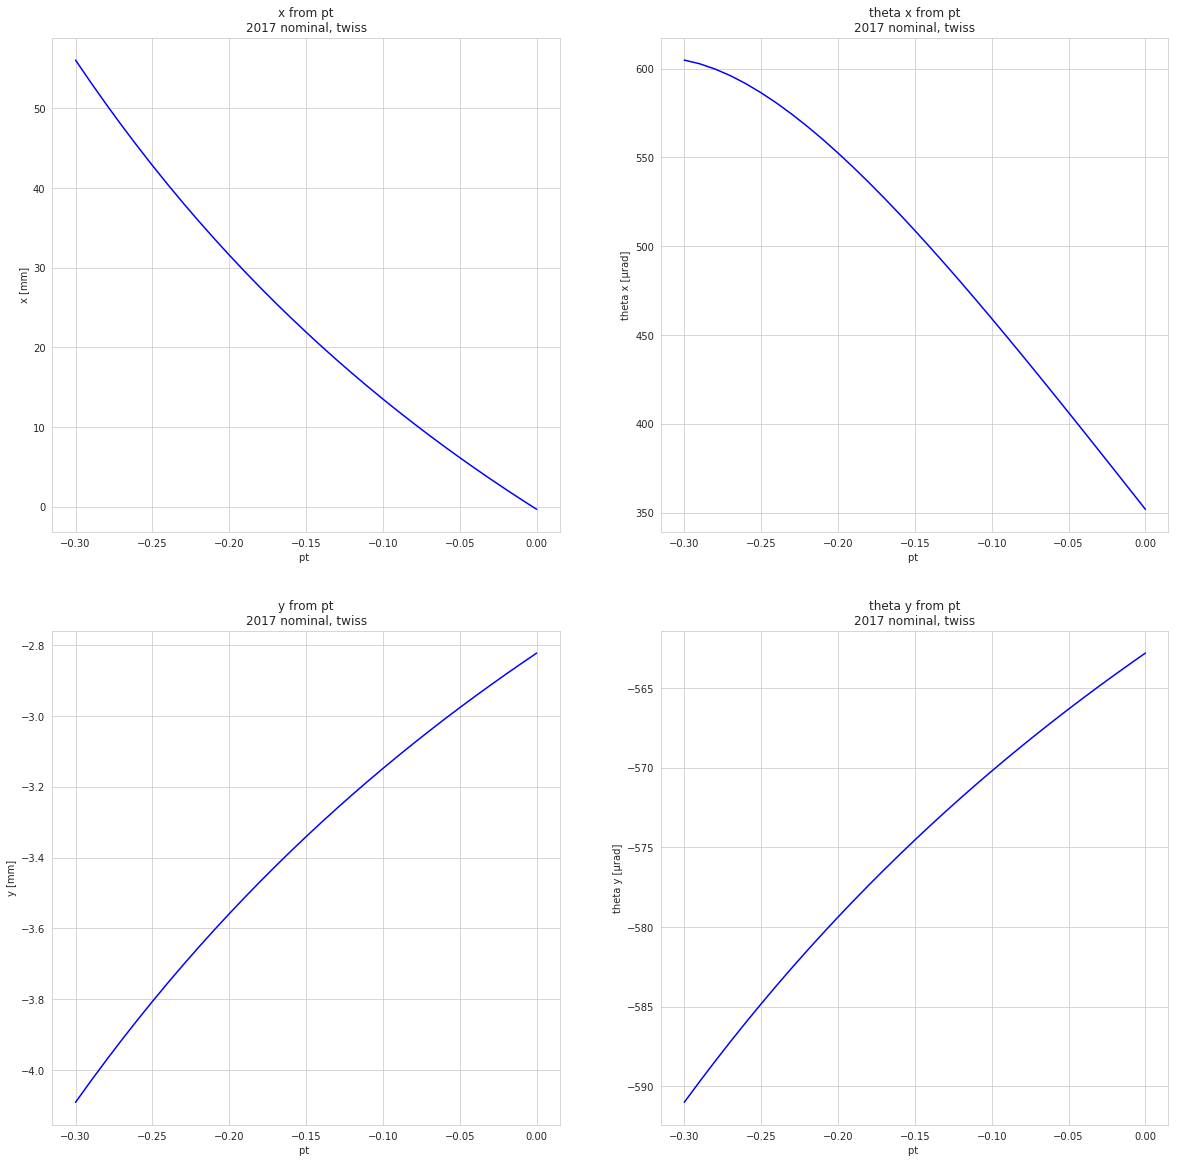

In [9]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

mapping = indexes.ptc_twiss

plotter.plot_from_one_matrix("pt", "x", matrix, mapping, axes, 0, 0, title_sufix)
plotter.plot_from_one_matrix("pt", "theta x", matrix, mapping, axes, 0, 1, title_sufix)
plotter.plot_from_one_matrix("pt", "y", matrix, mapping, axes, 1, 0, title_sufix)
plotter.plot_from_one_matrix("pt", "theta y", matrix, mapping, axes, 1, 1, title_sufix)